## Model simulation: Chemical reactor with heat transfer

$$\frac{d[N_2O_5]}{dt}= -2A_re^{\frac{-E_{A}}{RT}}[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[N_2O_4]}{dt}= 2A_re^{\frac{-E_{A}}{RT}}[N_2O_5]+ \frac{Q}{V}({[N_2O_4]}_{in} - [N_2O_4])$$
$$\frac{d[T]}{dt}= \frac{Q \rho C_{p}(T_{in}-T)+UA(T_{w}-T)-VA_re^{\frac{-E_{A}}{RT}}[N_2O_5]\Delta_{r}H}{V \rho C_{p}}$$

In [2]:
# Importing python libraries
import sys
import os
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons, Label

%load_ext autoreload
%autoreload 1

# We import all of our functions prepared in advanced
sys.path.append("../functions")
%aimport general_functions
%aimport heat
function_derivatives = heat.model_derivatives

#Check Python version
print(sys.version)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


## Model simulation

In [3]:
# Initial conditions
N2O5_init = 0
N2O4_init = 0
T_init = 310

# Definition of parameters
Ar=1.54e13
Ea=100320
Q=0.5
V=100
rho=0.79
Cp=52.82
U=250
A=2
delta_rH=-6000
N2O5_in=0.02
N2O4_in=0
Tin=250
Tw=330

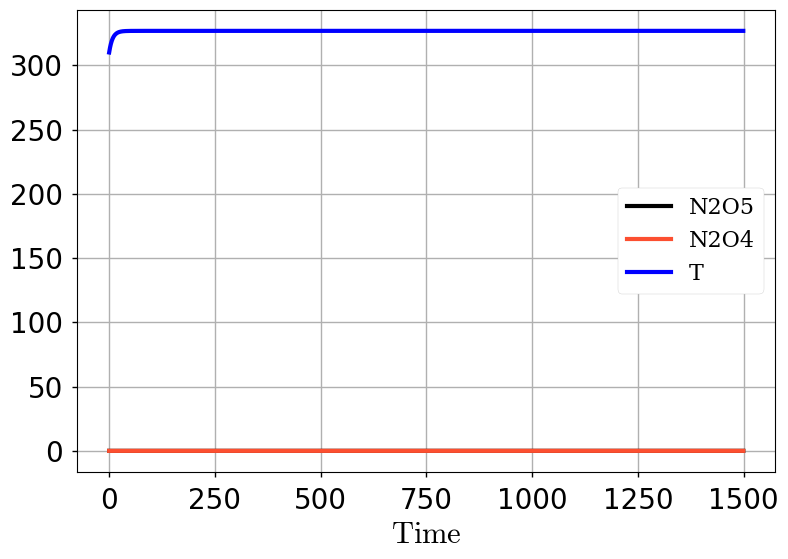

In [4]:
df = general_functions.model(
    np.arange(0, 1500, 1),          # Time steps
    [N2O5_init, N2O4_init, T_init], # Initial conditions
    ['N2O5','N2O4','T'],            # Variable names
    function_derivatives,           # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    Ar=Ar, Ea=Ea, Q=Q, V=V, rho=rho,
    Cp=Cp, U=U, A=A, delta_rH=delta_rH,
    N2O5_in=N2O5_in, N2O4_in=N2O4_in, Tin=Tin, Tw=Tw)

Since $T$ has different order of magnitude compared to $N_2O_5$ and $N_2O_4$, it is more logic to plot $T$ on a different scale (Please note that other colors are now used).

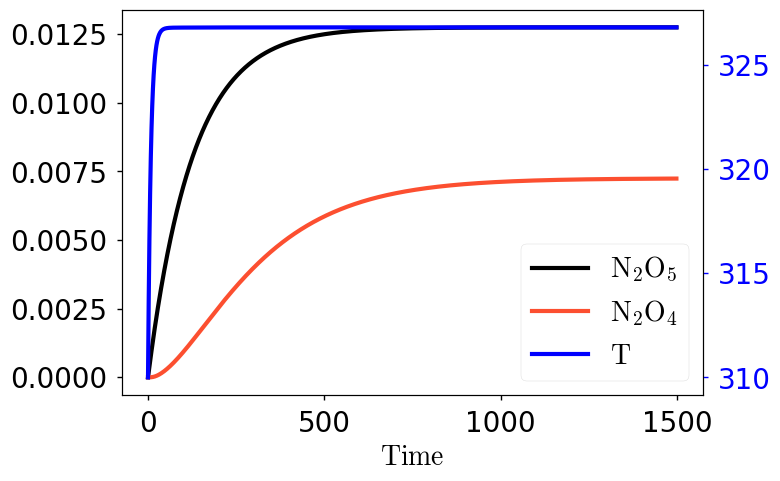

In [5]:
fig, ax1 = plt.subplots(figsize=(7.5,5))        
ax1_twin = ax1.twinx()                        
plot_1= ax1.plot(df['N2O5'],label=r'$\mathrm{N_2O_5}$'); 
plot_2 = ax1.plot(df['N2O4'],label=r'$\mathrm{N_2O_4}$');  
plot_twin = ax1_twin.plot(df['T'], color='blue',label=r'$\mathrm{T}$')     

ax1_twin.yaxis.label.set_color('blue')
ax1_twin.tick_params(axis='y', colors='blue')
ax1.set_xlabel(r'$\mathrm{Time}$', fontsize=20,rotation=0)

plots = plot_1 + plot_2 + plot_twin
labs = [leg.get_label() for leg in plots]
ax1.legend(plots, labs, loc=4)
ax1_twin.grid(False)
ax1.grid(False)

plt.show()

$$\frac{d[N_2O_5]}{dt}= -2A_re^{\frac{-E_{A}}{RT}}[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[N_2O_4]}{dt}= 2A_re^{\frac{-E_{A}}{RT}}[N_2O_5]+ \frac{Q}{V}({[N_2O_4]}_{in} - [N_2O_4])$$
$$\frac{d[T]}{dt}= \frac{Q \rho C_{p}(T_{in}-T)+UA(T_{w}-T)-VA_re^{\frac{-E_{A}}{RT}}[N_2O_5]\Delta_{r}H}{V \rho C_{p}}$$

## Impact of model parameters

Note that  ```twinax=True ``` to plot Temperature on a secondary axis.

In [6]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0, 1500, 1)),
         init=fixed([ 0, 0, 310]), varnames=fixed([r'$N_2O_5$',r'$N_2O_4$',r'$\mathrm{T}$']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),twinax=fixed(True),
         N2O5_in=fixed(0.01), N2O4_in=fixed(0),
         Q=FloatSlider(value=0.5, min=0, max=5, step=.5, name=r'$Q$',
          continuous_update=False),
         V=FloatSlider(value=100, min=0, max=1000, step=10, name=r'$V$',
          continuous_update=False),
         U=FloatSlider(value=250, min=0, max=1000, step=50, name=r'$U$', 
          continuous_update=False),
         A=FloatSlider(value=2, min=0, max=10, step=0.5, name=r'$A$', 
          continuous_update=False),
         delta_rH=FloatSlider(value=-6000, min=-10000, max=6000, step=1000, name=r'$\Delta_{r}H$',
          continuous_update=False),
         Ea=FloatSlider(value=100320, min=98000, max=102000, step=100, name=r'$E_a$',
          continuous_update=False),
         Ar=FloatSlider(value=1.54e13, min=5e12, max=5e13, step=1e12, name=r'$A_r$', 
          continuous_update=False),
         rho=FloatSlider(value=0.79, min=0.5, max=1, step=0.01, name=r'$\rho$', 
          continuous_update=False),
         Cp=FloatSlider(value=52.82, min=40, max=75, step=1, name=r'$C_p$', 
          continuous_update=False),
         Tin=FloatSlider(value=250, min=200, max=300, step=10, name=r'$T_{in}$',
          continuous_update=False),
         Tw=FloatSlider(value=330, min=300, max=350, step=10, name=r'$T_w$',
          continuous_update=False));

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Q', max=5.0, step=0.5), Flo…

# Calculation of the order of magnitude of the different processes

In [7]:
# We extract the steady-state values
T_ss = df['T'].iloc[-1] 
N2O5_ss = df['N2O5'].iloc[-1] 

# We calculate each term
transport = Q/V*(Tin-T_ss)
heat_transfer = U*A/(V*rho*Cp)*(Tw-T_ss)
reaction = -V*Ar/(V*rho*Cp)*np.exp(-Ea/(8.314*T_ss))*N2O5_ss*(delta_rH)

print('Steady-state temperature [K]= {:.2f}, Steady-state [N205] [mol/L]= {:.6f}'.format(T_ss,N2O5_ss))
print('Transport [K/s]= {:.4f}, Heat-transfer [K/s]= {:.4f}, Reaction [K/s]= {:.6f}, dT/dt [K/s] = {:4e}'.format(transport,heat_transfer,reaction, transport+heat_transfer+reaction))

Steady-state temperature [K]= 326.82, Steady-state [N205] [mol/L]= 0.012748
Transport [K/s]= -0.3841, Heat-transfer [K/s]= 0.3815, Reaction [K/s]= 0.002607, dT/dt [K/s] = 6.576524e-10


### On species

$$\frac{d[N_2O_5]}{dt}= -2A_re^{\frac{-E_{A}}{RT}}[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[N_2O_4]}{dt}= 2A_re^{\frac{-E_{A}}{RT}}[N_2O_5]+ \frac{Q}{V}({[N_2O_4]}_{in} - [N_2O_4])$$
$$\frac{d[T]}{dt}= \frac{Q \rho C_{p}(T_{in}-T)+UA(T_{w}-T)-VA_re^{\frac{-E_{A}}{RT}}[N_2O_5]\Delta_{r}H}{V \rho C_{p}}$$

# Sensitivity analysis of the heat balance model

In [8]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0, 1000, 1)), # Time steps
    init=fixed([ 0, 0, 310]),               # Initial conditions
    varnames=fixed(['N2O5','N2O4','T']),    # Variable names
    f=fixed(function_derivatives),          # Function derivatives
    parametername=ToggleButtons(options=['Ar', 'Ea', 'Q', 'V', 'rho', 'Cp',
                                        'U', 'A', 'delta_rH', 'N2O5_in',
                                        'N2O4_in', 'Tin', 'Tw']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    Ar=fixed(1.54e13), Ea=fixed(100320), Q=fixed(0.5), V=fixed(100), rho=fixed(0.79),
    Cp=fixed(52.82), U=fixed(250), A=fixed(2), delta_rH=fixed(-6000),
    N2O5_in=fixed(0.02), N2O4_in=fixed(0), Tin=fixed(250), Tw=fixed(330));

interactive(children=(ToggleButtons(description='parametername', options=('Ar', 'Ea', 'Q', 'V', 'rho', 'Cp', '…